In [ ]:
import os
import json
from train_unet import convert_labels
import matplotlib.pyplot as plt


In [ ]:
data_path = os.path.join(os.getcwd(), '..', 'data', 'raw')
img_path = os.path.join(data_path, 'images')
label_path = os.path.join(data_path, 'labels')

label_1 = os.listdir(label_path)[0]
img_1 = os.listdir(img_path)[0]
print(label_1)
print(img_1)
with open(os.path.join(label_path, label_1)) as f:
    test_label = convert_labels(f)


# Data Augmentation

In [38]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

import cv2
# from preprocessing import ImageDataGenerator
%matplotlib inline

In [25]:
data_path = os.path.join(os.getcwd(), '..', 'data', 'processed')
image_path = os.path.join(data_path, 'images')
image_names = os.listdir(image_path)

mask_path = os.path.join(data_path, 'labels', 'regions')
mask_names = os.listdir(mask_path)
# mask_names == image_names

True

In [43]:
np.min(mask_temp)

0

(240, 320)


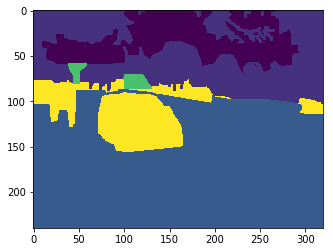

In [39]:
mask_temp = plt.imread(os.path.join(mask_path, mask_names[1]))
print(mask_temp.shape)

plt.imshow(mask_temp)

(240, 320, 3)


<IPython.core.display.Javascript object>


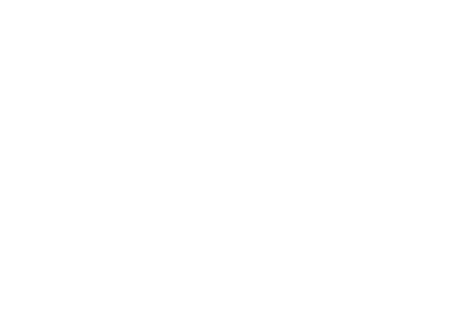

<IPython.core.display.Javascript object>


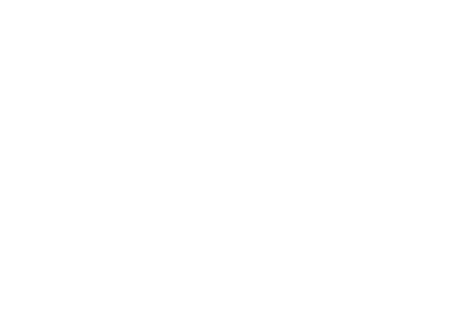

In [37]:
img_temp = plt.imread(os.path.join(image_path, image_names[1]))
print(img_temp.shape)

plt.imshow(img_temp)


(240, 320, 3)


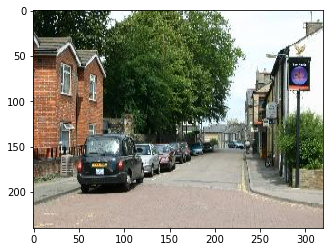

In [21]:
print(cv2.resize(img_temp,(320,240)).shape)
plt.imshow(cv2.resize(img_temp,(320,240)))

In [54]:
def resizing():
    '''
    resizes the images and masks to 240,320
    '''
    images = []
    masks = []
    for i in range(len(image_names)):
        img_temp = plt.imread(os.path.join(image_path, image_names[i]))
        if img_temp.shape == (240,320,3):
            images.append(plt.imread(os.path.join(image_path, image_names[i])))
            masks.append(plt.imread(os.path.join(mask_path, mask_names[i])))
        else:
            print('Resizing image {} from {} -> (240,320)'.format(image_names[i],
                                                                 img_temp.shape))
            images.append(cv2.resize(img_temp, (320,240)))
            masks.append(cv2.resize(plt.imread(os.path.join(mask_path, mask_names[i])), (320,240)))
            
    return images, masks

transformed_images, transformed_masks = resizing()

Resizing image 5000131.tif from (213, 320, 3) -> (240,320)
Resizing image 0100026.tif from (213, 320, 3) -> (240,320)
Resizing image 9003250.tif from (262, 320, 3) -> (240,320)
Resizing image 8002764.tif from (320, 214, 3) -> (240,320)
Resizing image 9000001.tif from (238, 320, 3) -> (240,320)
Resizing image 2000033.tif from (211, 320, 3) -> (240,320)
Resizing image 6000318.tif from (214, 320, 3) -> (240,320)
Resizing image 3001018.tif from (213, 320, 3) -> (240,320)
Resizing image 9004242.tif from (320, 240, 3) -> (240,320)
Resizing image 5000199.tif from (213, 320, 3) -> (240,320)
Resizing image 0104194.tif from (320, 291, 3) -> (240,320)
Resizing image 0004774.tif from (213, 320, 3) -> (240,320)
Resizing image 1000351.tif from (320, 240, 3) -> (240,320)
Resizing image 1001688.tif from (213, 320, 3) -> (240,320)
Resizing image 3003328.tif from (213, 320, 3) -> (240,320)
Resizing image 5000127.tif from (213, 320, 3) -> (240,320)
Resizing image 1000063.tif from (320, 240, 3) -> (240,32

Resizing image 1100027.tif from (236, 320, 3) -> (240,320)
Resizing image 0007323.tif from (224, 320, 3) -> (240,320)
Resizing image 3003322.tif from (260, 320, 3) -> (240,320)
Resizing image 0100061.tif from (213, 320, 3) -> (240,320)
Resizing image 5000128.tif from (320, 240, 3) -> (240,320)
Resizing image 5000130.tif from (213, 320, 3) -> (240,320)
Resizing image 1001685.tif from (213, 320, 3) -> (240,320)
Resizing image 5000202.tif from (213, 320, 3) -> (240,320)
Resizing image 2000041.tif from (213, 320, 3) -> (240,320)
Resizing image 1001875.tif from (213, 320, 3) -> (240,320)
Resizing image 2000044.tif from (179, 320, 3) -> (240,320)
Resizing image 4000066.tif from (320, 240, 3) -> (240,320)
Resizing image 0101060.tif from (242, 320, 3) -> (240,320)
Resizing image 5000147.tif from (213, 320, 3) -> (240,320)
Resizing image 5000188.tif from (320, 213, 3) -> (240,320)
Resizing image 9000029.tif from (320, 240, 3) -> (240,320)
Resizing image 5000204.tif from (213, 320, 3) -> (240,32

In [7]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
generator = datagen.flow_from_directory(
        image_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

In [ ]:
gen = ImageDataGenerator(rotation_range=10,
                        width_shift_range=0,
                        height_shift_range=0,
                        shear_range=0.15,
                        zoom_range=0.1,
                        channel_shift_range=10,
                        horizontal_flip=True)

In [ ]:
test_img= np.expand_dims(plt.imread(os.path.join(img_path,img_1)),0)

plt.imshow(test_img[0])
plt.show()
print(test_img.shape)
aug_iter = gen.flow(test_img)

In [ ]:
plt.imshow(next(aug_iter)[0].astype(np.uint8))
plt.show()

In [ ]:
aug_images = [next(aug_iter)[0]]

# Create right paths and also processed data

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import convert_labels

import pyarrow
import pyarrow.parquet as pq

import cv2
%matplotlib notebook

In [ ]:
data_path = os.path.join(os.getcwd(), '..', 'data', 'raw')
img_path = os.path.join(data_path, 'images')
label_path = os.path.join(data_path, 'labels')

In [ ]:
label_names = os.listdir(label_path)
label_names

img_names = os.listdir(img_path)
img_names.sort()

In [ ]:
regions_names = [x for x in label_names if 'regions' in x]
surfaces_names = [x for x in label_names if 'surfaces' in x]
layers_names = [x for x in label_names if 'layers' in x]

# sort them
regions_names.sort()
surfaces_names.sort()
layers_names.sort()

common_names = [x.split('.')[0] for x in regions_names]
# checking is sorted right
x1 = [x.split('.')[0] for x in regions_names]
x2 = [x.split('.')[0] for x in surfaces_names]
x3 = [x.split('.')[0] for x in layers_names]
x4 = [x.split('.')[0] for x in img_names]

print(x1 == x2)
print(x1 == x3)
print(x2 == x3)
print(x1 == x4)

In [ ]:
print(os.path.join(label_path, regions_names[0]))
print(os.path.join(label_path, surfaces_names[0]))
print(os.path.join(label_path, layers_names[0]))
print(os.path.join(img_path, img_names[0]))

In [ ]:
img_1 = plt.imread(os.path.join(img_path, img_names[0]))
plt.imshow(img_1)

In [ ]:
# Reading the regions txt file
with open(os.path.join(label_path,regions_names[0])) as f:
    reg_1 = convert_labels(f)
# Reading the surfaces txt file
with open(os.path.join(label_path,surfaces_names[0])) as f:
    surf_1 = convert_labels(f)
# Reading the layers txt file
with open(os.path.join(label_path,layers_names[0])) as f:
    lay_1 = convert_labels(f)


In [ ]:
img_1

In [ ]:
img_1[:,:,[2,1,0]]

In [ ]:
img_1.shape[:-1]

In [ ]:
# plotting the region labels
plt.imshow(np.reshape(reg_1,img_1.shape[:-1]))
# surf_1
# lay_1

In [ ]:
# plotting the surface labels
plt.imshow(np.reshape(surf_1,img_1.shape[:-1]))

In [ ]:
print(max(surf_1))
print(min(surf_1))
print(len(surf_1))

print(max(reg_1))
print(min(reg_1))
print(len(reg_1))


In [ ]:
common_names[0]

In [ ]:
np.reshape(surf_1,img_1.shape[:-1])

In [ ]:
cv2.imwrite(os.path.join(processed_label_path,common_names[0]) +'.tif',a)

In [ ]:
for i in range(len(regions_names)):
    cv2.imwrite(regions_names[i],)

In [ ]:
def make_dir(directory):
    '''
    Creates a directory if there is no directory
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
    else:
        print("Directory already exist: {}. No action taken".format(directory))

In [ ]:
import os

processed_data_path = os.path.join(os.getcwd(), '..', 'data', 'processed')
processed_label_path = os.path.join(processed_data_path, 'labels')

if not os.path.exists(processed_label_path):
    os.makedirs(processed_label_path)